In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
url = (
    "https://apisidra.ibge.gov.br/values/"
    "t/3939/"
    "n1/all/"
    "n2/all/"
    "n8/all/"
    "v/all/"
    "p/all/"
    "c79/2670"
)

In [3]:
cattle_raw = pd.DataFrame(json.loads(requests.get(url).text)[1:])

In [4]:
cattle_raw.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,1,Brasil,24,Cabeças,92495364,1,Brasil,105,Efetivo dos rebanhos,1974,1974,2670,Bovino
1,1,Brasil,24,Cabeças,102531758,1,Brasil,105,Efetivo dos rebanhos,1975,1975,2670,Bovino
2,1,Brasil,24,Cabeças,107349052,1,Brasil,105,Efetivo dos rebanhos,1976,1976,2670,Bovino
3,1,Brasil,24,Cabeças,107296556,1,Brasil,105,Efetivo dos rebanhos,1977,1977,2670,Bovino
4,1,Brasil,24,Cabeças,106942565,1,Brasil,105,Efetivo dos rebanhos,1978,1978,2670,Bovino


In [5]:
cattle_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NC      6864 non-null   object
 1   NN      6864 non-null   object
 2   MC      6864 non-null   object
 3   MN      6864 non-null   object
 4   V       6864 non-null   object
 5   D1C     6864 non-null   object
 6   D1N     6864 non-null   object
 7   D2C     6864 non-null   object
 8   D2N     6864 non-null   object
 9   D3C     6864 non-null   object
 10  D3N     6864 non-null   object
 11  D4C     6864 non-null   object
 12  D4N     6864 non-null   object
dtypes: object(13)
memory usage: 697.2+ KB


In [6]:
cattle_raw[["NC", "MC", "D1C", "D2C", "D4C"]] = cattle_raw[["NC", "MC", "D1C", "D2C", "D4C"]].astype(int)
cattle_raw["V"] = cattle_raw["V"].apply(pd.to_numeric, errors='coerce')
cattle_raw[["D3C", "D3N"]] = cattle_raw[["D3C", "D3N"]].apply(pd.to_datetime)
cattle_raw.index = cattle_raw["D3C"]

In [7]:
cattle_raw.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
D3C,,,,,,,,,,,,,
1974-01-01,1,Brasil,24,Cabeças,92495364.0,1,Brasil,105,Efetivo dos rebanhos,1974-01-01,1974-01-01,2670,Bovino
1975-01-01,1,Brasil,24,Cabeças,102531758.0,1,Brasil,105,Efetivo dos rebanhos,1975-01-01,1975-01-01,2670,Bovino
1976-01-01,1,Brasil,24,Cabeças,107349052.0,1,Brasil,105,Efetivo dos rebanhos,1976-01-01,1976-01-01,2670,Bovino
1977-01-01,1,Brasil,24,Cabeças,107296556.0,1,Brasil,105,Efetivo dos rebanhos,1977-01-01,1977-01-01,2670,Bovino
1978-01-01,1,Brasil,24,Cabeças,106942565.0,1,Brasil,105,Efetivo dos rebanhos,1978-01-01,1978-01-01,2670,Bovino


In [8]:
plot_viz = cattle_raw.query("NN == 'Grande Região'")

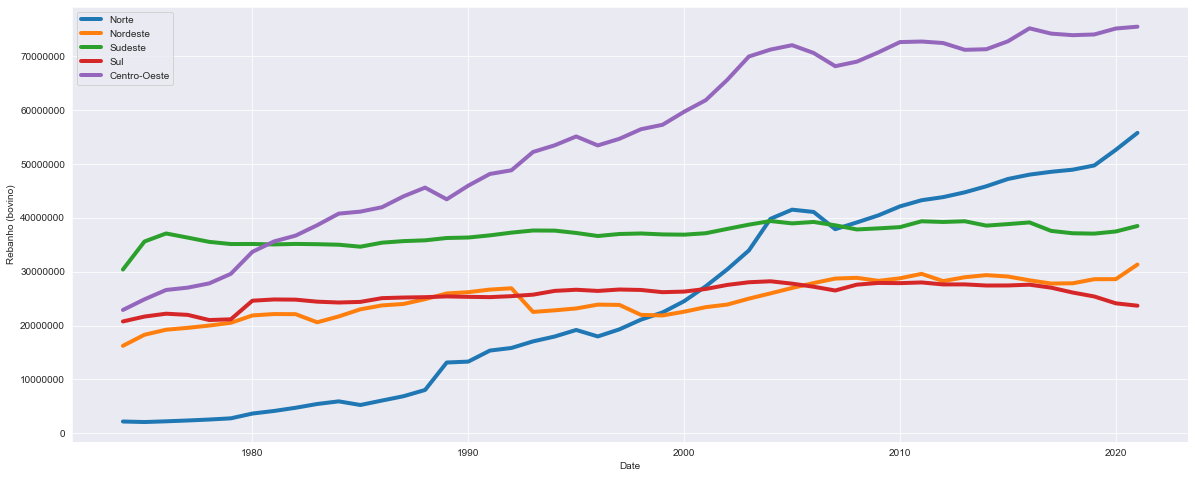

In [9]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(20, 8))

for regiao in plot_viz["D1N"].unique():
    data = plot_viz.query(f"D1N == '{regiao}'")
    sns.lineplot(data=data["V"], label=regiao, ax=ax, linewidth=4)

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.ylabel("Rebanho (bovino)")
plt.xlabel("Date")
plt.legend()
plt.show()

In [10]:
amazon = ["AC", "AM", "AP", "MA", "MT", "PA", "RO", "RR", "TO"]

In [11]:
amazon_df = cattle_raw[cattle_raw['D1N'].apply(lambda x: any(elem in x for elem in amazon))].copy()
amazon_df

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
D3C,,,,,,,,,,,,,
1974-01-01,8,Mesorregião Geográfica,24,Cabeças,NaN,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1974-01-01,1974-01-01,2670,Bovino
1975-01-01,8,Mesorregião Geográfica,24,Cabeças,NaN,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1975-01-01,1975-01-01,2670,Bovino
1976-01-01,8,Mesorregião Geográfica,24,Cabeças,NaN,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1976-01-01,1976-01-01,2670,Bovino
1977-01-01,8,Mesorregião Geográfica,24,Cabeças,NaN,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1977-01-01,1977-01-01,2670,Bovino
1978-01-01,8,Mesorregião Geográfica,24,Cabeças,NaN,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1978-01-01,1978-01-01,2670,Bovino
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01,8,Mesorregião Geográfica,24,Cabeças,2987083.0,5105,Sudeste Mato-grossense - MT,105,Efetivo dos rebanhos,2017-01-01,2017-01-01,2670,Bovino
2018-01-01,8,Mesorregião Geográfica,24,Cabeças,2971248.0,5105,Sudeste Mato-grossense - MT,105,Efetivo dos rebanhos,2018-01-01,2018-01-01,2670,Bovino
2019-01-01,8,Mesorregião Geográfica,24,Cabeças,3079127.0,5105,Sudeste Mato-grossense - MT,105,Efetivo dos rebanhos,2019-01-01,2019-01-01,2670,Bovino


In [12]:
amazon_df.dropna(inplace=True)
amazon_df

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
D3C,,,,,,,,,,,,,
1990-01-01,8,Mesorregião Geográfica,24,Cabeças,129095.0,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1990-01-01,1990-01-01,2670,Bovino
1991-01-01,8,Mesorregião Geográfica,24,Cabeças,142737.0,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1991-01-01,1991-01-01,2670,Bovino
1992-01-01,8,Mesorregião Geográfica,24,Cabeças,206657.0,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1992-01-01,1992-01-01,2670,Bovino
1993-01-01,8,Mesorregião Geográfica,24,Cabeças,239178.0,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1993-01-01,1993-01-01,2670,Bovino
1994-01-01,8,Mesorregião Geográfica,24,Cabeças,250440.0,1101,Madeira-Guaporé - RO,105,Efetivo dos rebanhos,1994-01-01,1994-01-01,2670,Bovino
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01,8,Mesorregião Geográfica,24,Cabeças,2987083.0,5105,Sudeste Mato-grossense - MT,105,Efetivo dos rebanhos,2017-01-01,2017-01-01,2670,Bovino
2018-01-01,8,Mesorregião Geográfica,24,Cabeças,2971248.0,5105,Sudeste Mato-grossense - MT,105,Efetivo dos rebanhos,2018-01-01,2018-01-01,2670,Bovino
2019-01-01,8,Mesorregião Geográfica,24,Cabeças,3079127.0,5105,Sudeste Mato-grossense - MT,105,Efetivo dos rebanhos,2019-01-01,2019-01-01,2670,Bovino


In [15]:
def_inc = {}
for mesoreg in amazon_df["D1N"].unique():
    def_inc[mesoreg] = (amazon_df.query(f" D1N == '{mesoreg}'")["V"]
        .pct_change(periods= len(amazon_df.query(f" D1N == '{mesoreg}'")) -1 )[-1])


In [16]:
def_inc

{'Madeira-Guaporé - RO': 34.73797590921414,
 'Leste Rondoniense - RO': 5.603355431107913,
 'Vale do Juruá - AC': 5.756587968759316,
 'Vale do Acre - AC': 9.792929581102305,
 'Norte Amazonense - AM': 0.22294814209881575,
 'Sudoeste Amazonense - AM': 1.5224132673406676,
 'Centro Amazonense - AM': -0.18016772058294495,
 'Sul Amazonense - AM': 9.618301165866562,
 'Norte de Roraima - RR': 0.49050292919259686,
 'Sul de Roraima - RR': 9.003644490979381,
 'Baixo Amazonas - PA': 2.023695711010635,
 'Marajó - PA': -0.5551964929590989,
 'Metropolitana de Belém - PA': 0.25776177379568455,
 'Nordeste Paraense - PA': 1.3539400456313606,
 'Sudoeste Paraense - PA': 7.332246338955276,
 'Sudeste Paraense - PA': 3.1949779471336006,
 'Norte do Amapá - AP': -0.2035301634630744,
 'Sul do Amapá - AP': -0.2871759678073432,
 'Ocidental do Tocantins - TO': 1.4198581907989483,
 'Oriental do Tocantins - TO': 1.165828886211052,
 'Norte Maranhense - MA': -0.07021748983997478,
 'Oeste Maranhense - MA': 1.88644958900

In [17]:
# Sort the dictionary by value in ascending order
sorted_dict = dict(sorted(def_inc.items(), key=lambda x: x[1], reverse=True))
sorted_dict

{'Madeira-Guaporé - RO': 34.73797590921414,
 'Vale do Acre - AC': 9.792929581102305,
 'Sul Amazonense - AM': 9.618301165866562,
 'Sul de Roraima - RR': 9.003644490979381,
 'Sudoeste Paraense - PA': 7.332246338955276,
 'Norte Mato-grossense - MT': 6.493197856320159,
 'Vale do Juruá - AC': 5.756587968759316,
 'Leste Rondoniense - RO': 5.603355431107913,
 'Sudeste Paraense - PA': 3.1949779471336006,
 'Sudoeste Mato-grossense - MT': 2.2840490046053796,
 'Nordeste Mato-grossense - MT': 2.271813912739109,
 'Baixo Amazonas - PA': 2.023695711010635,
 'Oeste Maranhense - MA': 1.8864495890084583,
 'Sudoeste Amazonense - AM': 1.5224132673406676,
 'Sul Maranhense - MA': 1.4936291108851312,
 'Centro-Sul Mato-grossense - MT': 1.4729608936306486,
 'Ocidental do Tocantins - TO': 1.4198581907989483,
 'Nordeste Paraense - PA': 1.3539400456313606,
 'Centro Maranhense - MA': 1.2543750211781521,
 'Oriental do Tocantins - TO': 1.165828886211052,
 'Leste Maranhense - MA': 0.7374558965583093,
 'Norte de Rorai

In [18]:
top10_cattle = list(sorted_dict.keys())[:10]

In [64]:
amazon_df.query(f"D1N == '{top10_cattle[0]}'")["D1C"].unique()[0]

1101

In [67]:
# Obter os limites geográficos de cada mesorregião
meso_geojsons = []
for meso_id in top10_cattle:
    id = amazon_df.query(f"D1N == '{meso_id}'")["D1C"].unique()[0]
    url = f'https://servicodados.ibge.gov.br/api/v3/malhas/mesorregioes/{id}?formato=application/vnd.geo+json&qualidade=maxima'
    response = requests.get(url)
    meso_geojsons.append(response.json())

# Criar um trace do tipo Scattergeo para cada mesorregião
traces = []
for i, meso_geojson in enumerate(meso_geojsons):
    coordinates = meso_geojson['features'][0]['geometry']['coordinates'][0]
    latitudes = [coord[1] for coord in coordinates]
    longitudes = [coord[0] for coord in coordinates]
    trace = go.Scattergeo(
        lat=latitudes,
        lon=longitudes,
        mode='lines',
        line=dict(width=1.5),
        text = top10_cattle[i],
        hoverinfo = "text",
        name = top10_cattle[i]
    )
    traces.append(trace)

# Criar a figura do mapa
fig = go.Figure(traces)

# Configurar o layout do mapa
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        projection_type='mercator'
    ),
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=0, b=0),
)

# Centralizar a visão no Brasil
fig.update_geos(center=dict(lon=-55, lat=-15), scope='south america')

# Exibir o mapa
fig.show()